In [1]:
import numpy as np

In [52]:
X = np.load('./X_reference.npy') 
y = np.load('./y_reference.npy')
print(X.shape, y.shape)

(60000, 1000) (60000,)


In [54]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [58]:
lda = LinearDiscriminantAnalysis(n_components=2)  # Example: Reduce to 2 components
X_lda = lda.fit_transform(X_train, y_train)

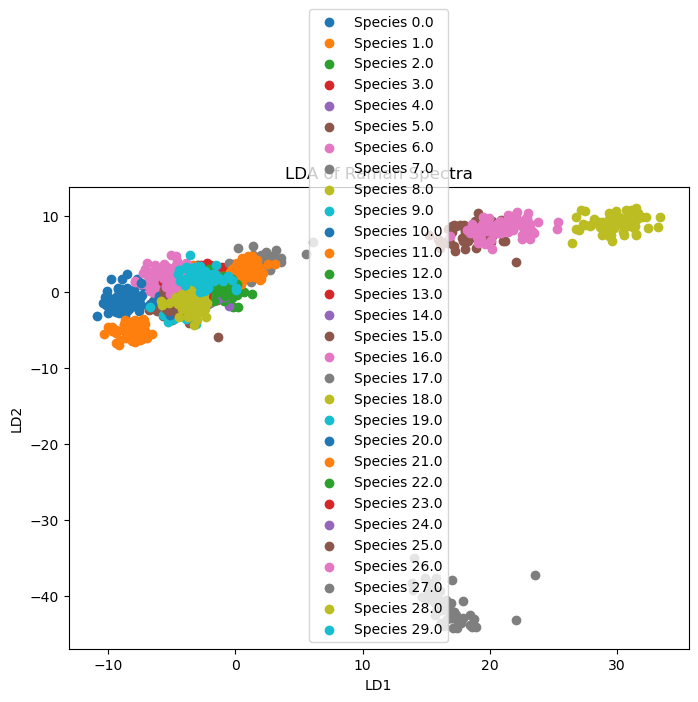

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
for i, species in enumerate(np.unique(y_train)):
    plt.scatter(X_lda[y_train == species, 0], X_lda[y_train == species, 1], label=f'Species {species}')
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.legend()
plt.title('LDA of Raman Spectra')
plt.show()

In [60]:
lda_classifier = LinearDiscriminantAnalysis()
lda_classifier.fit(X_train, y_train)
y_pred = lda_classifier.predict(X_test)

In [63]:
from sklearn.metrics import accuracy_score, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

conf_matrix = confusion_matrix(y_test, y_pred)


Accuracy: 0.93


In [65]:
import seaborn as sns
# Import the STRAINS dictionary from config.py
from config import STRAINS

[Text(0, 0.5, 'C. albicans'),
 Text(0, 1.5, 'C. glabrata'),
 Text(0, 2.5, 'K. aerogenes'),
 Text(0, 3.5, 'E. coli 1'),
 Text(0, 4.5, 'E. coli 2'),
 Text(0, 5.5, 'E. faecium'),
 Text(0, 6.5, 'E. faecalis 1'),
 Text(0, 7.5, 'E. faecalis 2'),
 Text(0, 8.5, 'E. cloacae'),
 Text(0, 9.5, 'K. pneumoniae 1'),
 Text(0, 10.5, 'K. pneumoniae 2'),
 Text(0, 11.5, 'P. mirabilis'),
 Text(0, 12.5, 'P. aeruginosa 1'),
 Text(0, 13.5, 'P. aeruginosa 2'),
 Text(0, 14.5, 'MSSA 1'),
 Text(0, 15.5, 'MSSA 3'),
 Text(0, 16.5, 'MRSA 1 (isogenic)'),
 Text(0, 17.5, 'MRSA 2'),
 Text(0, 18.5, 'MSSA 2'),
 Text(0, 19.5, 'S. enterica'),
 Text(0, 20.5, 'S. epidermidis'),
 Text(0, 21.5, 'S. lugdunensis'),
 Text(0, 22.5, 'S. marcescens'),
 Text(0, 23.5, 'S. pneumoniae 2'),
 Text(0, 24.5, 'S. pneumoniae 1'),
 Text(0, 25.5, 'S. sanguinis'),
 Text(0, 26.5, 'Group A Strep.'),
 Text(0, 27.5, 'Group B Strep.'),
 Text(0, 28.5, 'Group C Strep.'),
 Text(0, 29.5, 'Group G Strep.')]

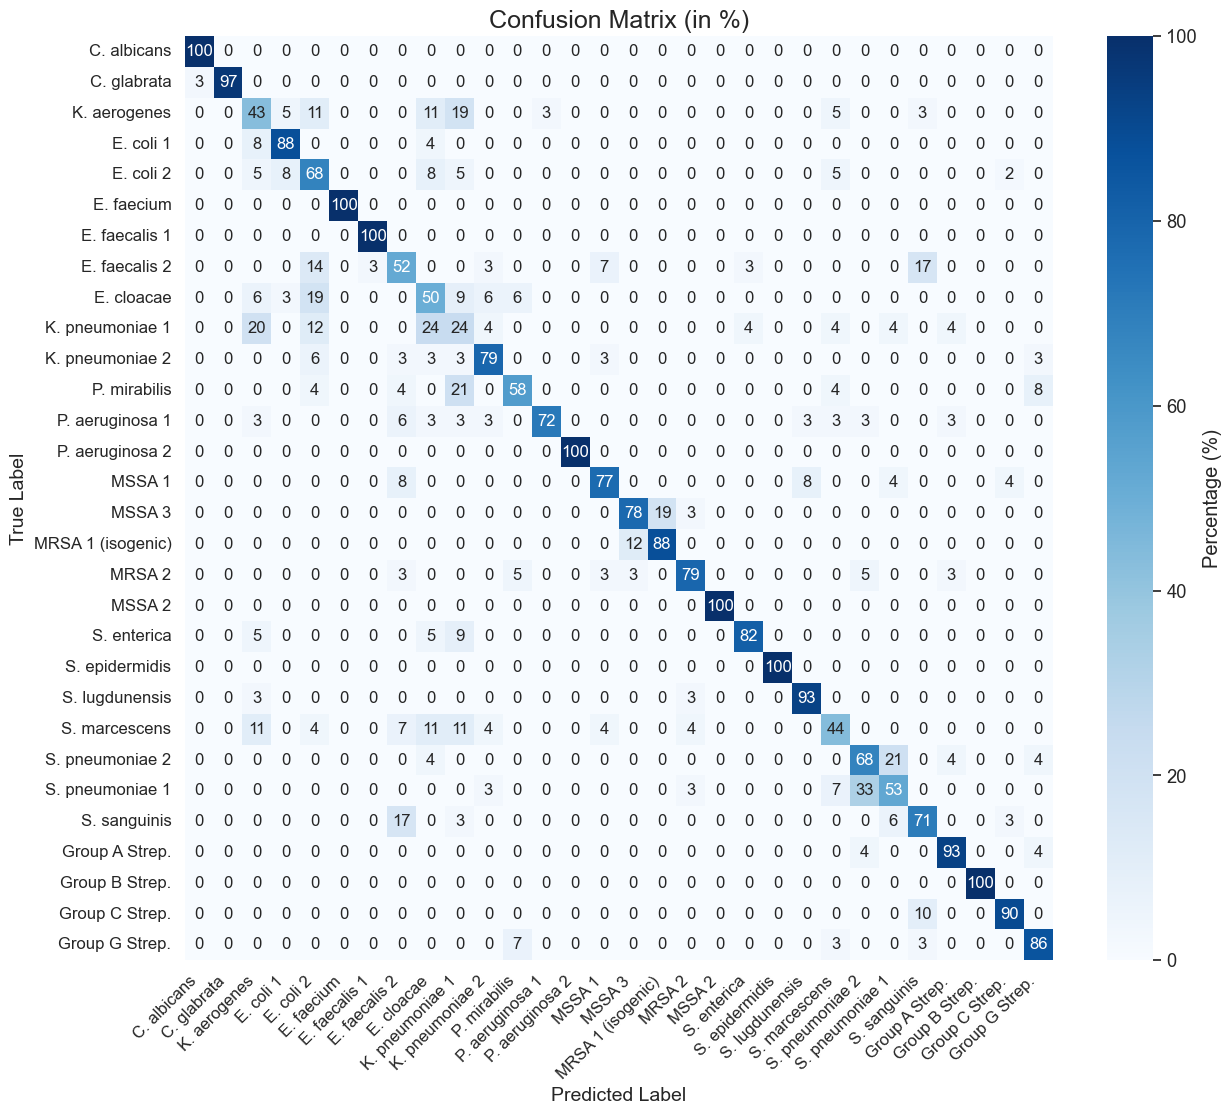

In [42]:
# Get the strain names in the correct order
labels = [STRAINS[i] for i in range(len(STRAINS))]

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(14, 12)) 
sns.set(font_scale=1.2)  
heatmap = sns.heatmap(conf_matrix_percent, annot=True, fmt="d", cmap="Blues", 
                      xticklabels=labels, yticklabels=labels, 
                      annot_kws={"size": 12}, cbar_kws={'label': 'Percentage (%)'}) 


plt.xlabel('Predicted Label', fontsize=14)
plt.ylabel('True Label', fontsize=14)
plt.title('Confusion Matrix (in %)', fontsize=18)


heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=12)
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=0, fontsize=12)